##### Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns

In [3]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\K\Anaconda373\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


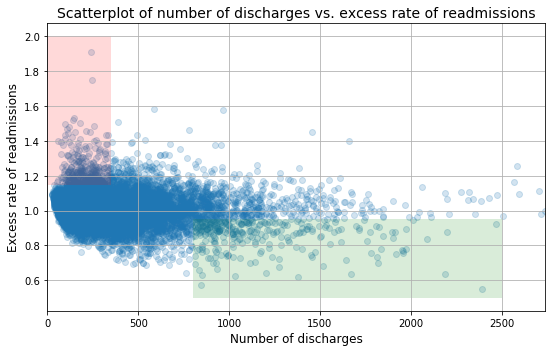

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?

It isn't clear from the analysis whether there was an initial hypothesis, so it's difficult to determine what was being 
tested. Is it that the number of discharges has no effect on the ratio of excess readmissions?  Is it that the size of a hosptial has no influence on the ratio of readmissions?

Additionally, there isn't any data regarding hospital resources, so unless there's other data that has such statistics, it's not clear how they reach the conclusion that smaller hospitals may be lacking the resources to give the quality of care necessary to minimize the number of readmissions. 

In [58]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


(array([4.636e+03, 3.840e+03, 1.759e+03, 7.110e+02, 3.160e+02, 1.330e+02,
        8.900e+01, 4.100e+01, 2.300e+01, 1.000e+01, 1.000e+01, 6.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.        ,  226.43333333,  452.86666667,  679.3       ,
         905.73333333, 1132.16666667, 1358.6       , 1585.03333333,
        1811.46666667, 2037.9       , 2264.33333333, 2490.76666667,
        2717.2       , 2943.63333333, 3170.06666667, 3396.5       ,
        3622.93333333, 3849.36666667, 4075.8       , 4302.23333333,
        4528.66666667, 4755.1       , 4981.53333333, 5207.96666667,
        5434.4       , 5660.83333333, 5887.26666667, 6113.7       ,
        6340.13333333, 6566.56666667, 6793.        ]),
 <a list of 30 Patch objects>)

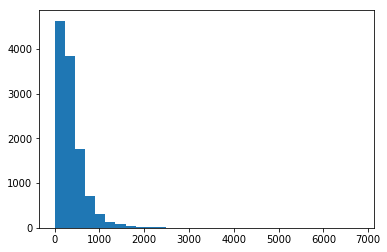

In [61]:
# A histogram of the number of discharges
plt.hist(clean_hospital_read_df['Number of Discharges'], bins=30)

(array([2.000e+00, 5.000e+00, 7.000e+00, 2.900e+01, 6.500e+01, 1.000e+02,
        3.060e+02, 8.520e+02, 1.751e+03, 2.592e+03, 2.485e+03, 1.694e+03,
        8.600e+02, 3.720e+02, 1.730e+02, 9.200e+01, 4.400e+01, 2.100e+01,
        2.300e+01, 1.100e+01, 5.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.5495    , 0.59483333, 0.64016667, 0.6855    , 0.73083333,
        0.77616667, 0.8215    , 0.86683333, 0.91216667, 0.9575    ,
        1.00283333, 1.04816667, 1.0935    , 1.13883333, 1.18416667,
        1.2295    , 1.27483333, 1.32016667, 1.3655    , 1.41083333,
        1.45616667, 1.5015    , 1.54683333, 1.59216667, 1.6375    ,
        1.68283333, 1.72816667, 1.7735    , 1.81883333, 1.86416667,
        1.9095    ]),
 <a list of 30 Patch objects>)

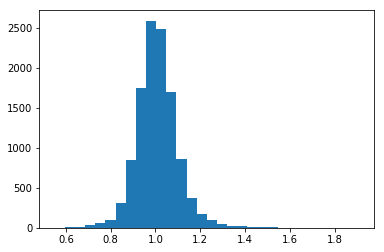

In [63]:
# A histogram of readmission ratios
plt.hist(clean_hospital_read_df['Excess Readmission Ratio'], bins=30)

The above histograms show that discharges are heavily skewed to the right, with a majority of discharges falling below 500.
The readmissions seems to center fairly evenly around 1.0, with slightly more falling below 1.0 than above it.

We'll begin by doing some inital cleaning of the dataset by dropping unimportant columns and rows that contain null values. 

In [22]:
# Check for null values
np.sum(clean_hospital_read_df.isnull())

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [8]:
# Eliminate Footnote column
clean = clean_hospital_read_df.drop(columns=['Footnote'])

In [9]:
# Drop any rows that contain null values
clean = clean.dropna(axis=0, how='any')
clean.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


In [33]:
# Divide the dataset by discharge size into two subsets
high_dis = clean[clean['Number of Discharges'] > 1000]
low_dis = clean[clean['Number of Discharges'] < 100]

In [34]:
# Find info on the excess admission ratios for both subsets
print('Greater than 1000 discharges')
print(high_dis['Excess Readmission Ratio'].describe())
print()
print('Less than 100 discharges')
print(low_dis['Excess Readmission Ratio'].describe())

Greater than 1000 discharges
count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

Less than 100 discharges
count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64


The above tables suggest that the preliminary report is correct about the means of hosptials with discharges over 
1000 and well as those under 100.

In [11]:
# The percentage of hospitals over 1000 discharges that have an excess admissions ratio greater than 1. 
np.sum(high_dis['Excess Readmission Ratio'] > 1) / len(high_dis['Excess Readmission Ratio'])

0.4449244060475162

In [35]:
# The percentage of hospitals under 100 discharges that have an excess admissions ratio greater than 1.
np.sum(low_dis['Excess Readmission Ratio'] > 1) / len(low_dis['Excess Readmission Ratio'])

0.6321548821548821

The above tables and calculations suggest that the preliminary report is correct about the means and percentages of hosptials with discharges over 1000 and well as those under 100.

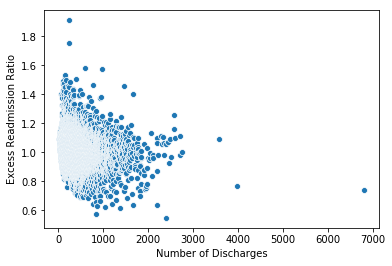

In [43]:
# Correlation between discharges and readmission ratios for all hospitals
sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean)

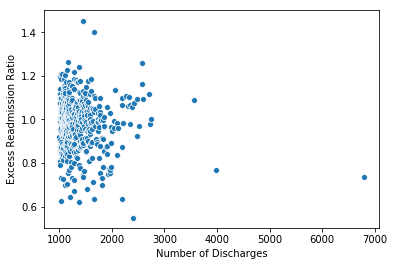

In [44]:
# Correlation between discharges and readmission ratios for all hospitals with discharges above 1000
sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=high_dis)

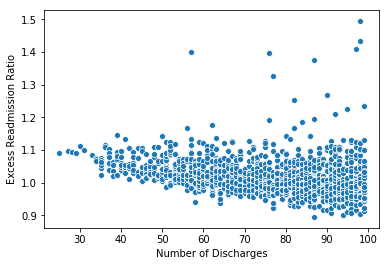

In [45]:
# Correlation between discharges and readmission ratios for all hospitals with discharges below 100
sns.scatterplot(x='Number of Discharges', y='Excess Readmission Ratio', data=low_dis)

Looking at the first of the above graphs, it appears that there is some small correlation between number of discharges and excess readmissions. However, the two subsequent graphs make it more clear as to what is actually occuring. In the second graph, for hospitals with greater than 1000 discharges, there seems to be almost no correlation between discharges and readmissions. In the third graph, for discharges less than 100, there does appear to be a negative correlation between discharges and readmissions - as discharges increase, readmission rates decrease overall. 

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

### 1) Setup an appropriate hypothesis test.

The null hypothesis is that there is not a significant correlation between the number of discharges(hospital size) and excess readmissions ratio.

The alternate hypothesis is that the there is a significant correlation between the number of discharges (hosptital size) and excess readmissions ratio. 

### 2) Compute and report the observed significance value (or p-value).

In [37]:
# Discharge and readmission values fromthe cleaned dataset
clean_dis = clean['Number of Discharges']
clean_read = clean['Excess Readmission Ratio']

In [38]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates1 = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates



In [47]:
# Compute observed correlation: r_obs
r_obs = pearson_r(clean_dis, clean_read)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute discharge measurments
    dis_perms = np.random.permutation(clean_dis)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(dis_perms, clean_read)

# Compute p-value: p
p = np.sum(perm_replicates < r_obs) / len(perm_replicates)
print('The correlation, r, for the discharges and readmission ratio is ', str(r_obs))
print('The p-value = ', p)

The correlation, r, for the discharges and readmission ratio is  -0.09739794351079353
The p-value =  0.0


There is a weak negative correlation between the number of discharges and the readmission ratios. The p-value of 0.0, which is lower than 𝛼 = .01, indicates that we can reject the null hypothesis that there is no correlation between those two variables. 

### 3) Report statistical significance for 𝛼 = .01. 

In [55]:
# 99% Confidence interval
conf_int = np.percentile(diff_reps, [0.5, 99.5])
print('The 99% confidence interval is ' + str(conf_int_freq))

The 99% confidence interval is [-0.09739794 -0.09739794]


In [57]:
# Calculate the combined standard deviation
com_std = ((np.std(clean_dis) / len(clean_dis)) + (np.std(clean_read) / len(clean_read))) **(1/2)

# Calculate the standard error
se =  com_std / (len(clean)) ** (1/2)

# Calculate margin of error
moe = 2.58 * se
print('The margin of error is ' + str(moe))

The margin of error is 0.003943638618398706


The p-value of 0.0 is beyopnd the threshold of 0.01, so the result is statistically significant and does warrant us to reject the null hypothesis.

### 4) Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statisitical significance refers to whether there is evidence to suggest an effect exists and whether the null hypothesis can be rejected. Practical significance refers to the magnitude of the effect and whether the effect is large enough to warrant a change. 

In this case, there is statistical significance in that we can reject the null hypothesis. However, that may not be enough to warrant the significant practical change that was given in the original recommendation. Hospitals with less than 300 discharges outnumber those with greater than 1000, and a consolidation of those described as underperforming would result in more larger hospital systems. Yet, it isn't clear that tis owul lead to significantly better results. The correlation between discharges and the readmissions ratio is a rather weak -0.097. It suggests that there is a correlation between the two variables and that larger hospitals have lower readmissions ratios, but  only slightly so. Consolidation would mean haivng to spend resources that could go towards better patient care instead. Consolidation could also lead to large, less efficient systems that result in lower patient care. Considering that there are many large hospitals that have ratios greater than one, there's no guarantee that consolidation would lead to siginificantly lower ratios. 

A better recommendation would be to look at individual hospitals, particularly those that appear to be outliers and have ratios much larger than one, and look at the specific challenges that they face. It may be the case that hospital size is not the only factor. Perhaps in the case of many of these hospitals, geography and demographics, particularly in smaller, more isolated communities, may have a greater percentage of risk factors that play a role in a larger ratio. For example, communities that have few physical activity resources (outdoor trails, gyms, walking paths, etc.) and an older population, may have a higher rate of heart issues and pneumonia.  In such a case, the resultng ratio may have less to do with resources and hospital size and more to do with the fact that these particular types of patients will get readmitted more often regardless.     

### 5) Look at the scatterplot above. 
   ### * What are the advantages and disadvantages of using this plot to convey information?
   ###  * Construct another plot that conveys the same information in a more direct manner.

The advantage of the original scatterplot is that it does allow for easy reading of a potential trend. However, it does have disadvantages in that when there is a high concentration of data in a small area, it makes it difficult to view just how densely concentrated the data may be. 

Perhaps any one plot conveys the necessary informatiom of what is a fairly complicated matter. A series of plots would work better. 

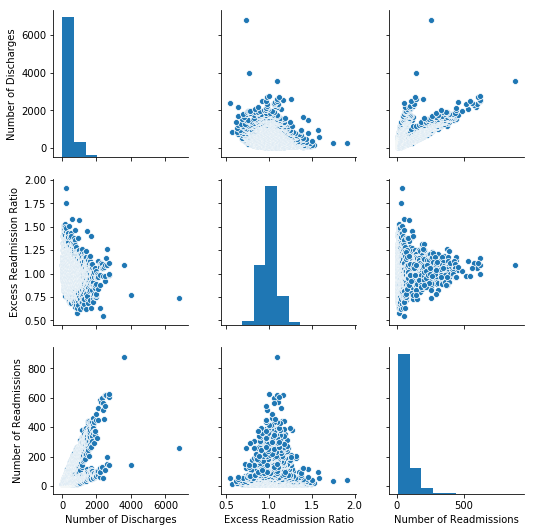

In [72]:
# A piarplot with discharges, readmissions ratio, as well as the acgual number of readmissions
sns.pairplot(clean, vars=['Number of Discharges', 'Excess Readmission Ratio', 'Number of Readmissions'])

The pairplot suggests that strong correlation between the number of discharges and the number of readmissions. However, as the number of readmissions grows, the ratio stays fairly stable.  

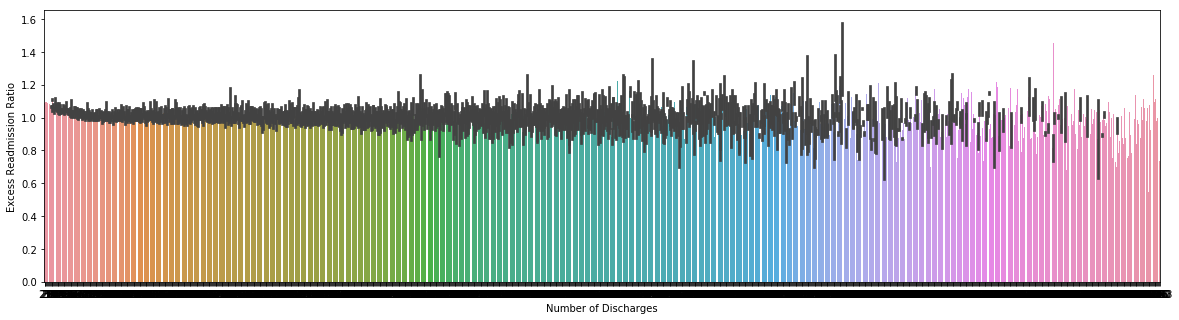

In [67]:
# A barplot od discharges vs readmsssions ratios
plt.figure(figsize=(20, 5))
sns.barplot(x ='Number of Discharges', y='Excess Readmission Ratio', data=clean)

This bar graph shows that there is a slightly downward trend in ratios as discharges increase, but the ratio seems to increase again towards the larger end of discharges. 

(0, 2500)

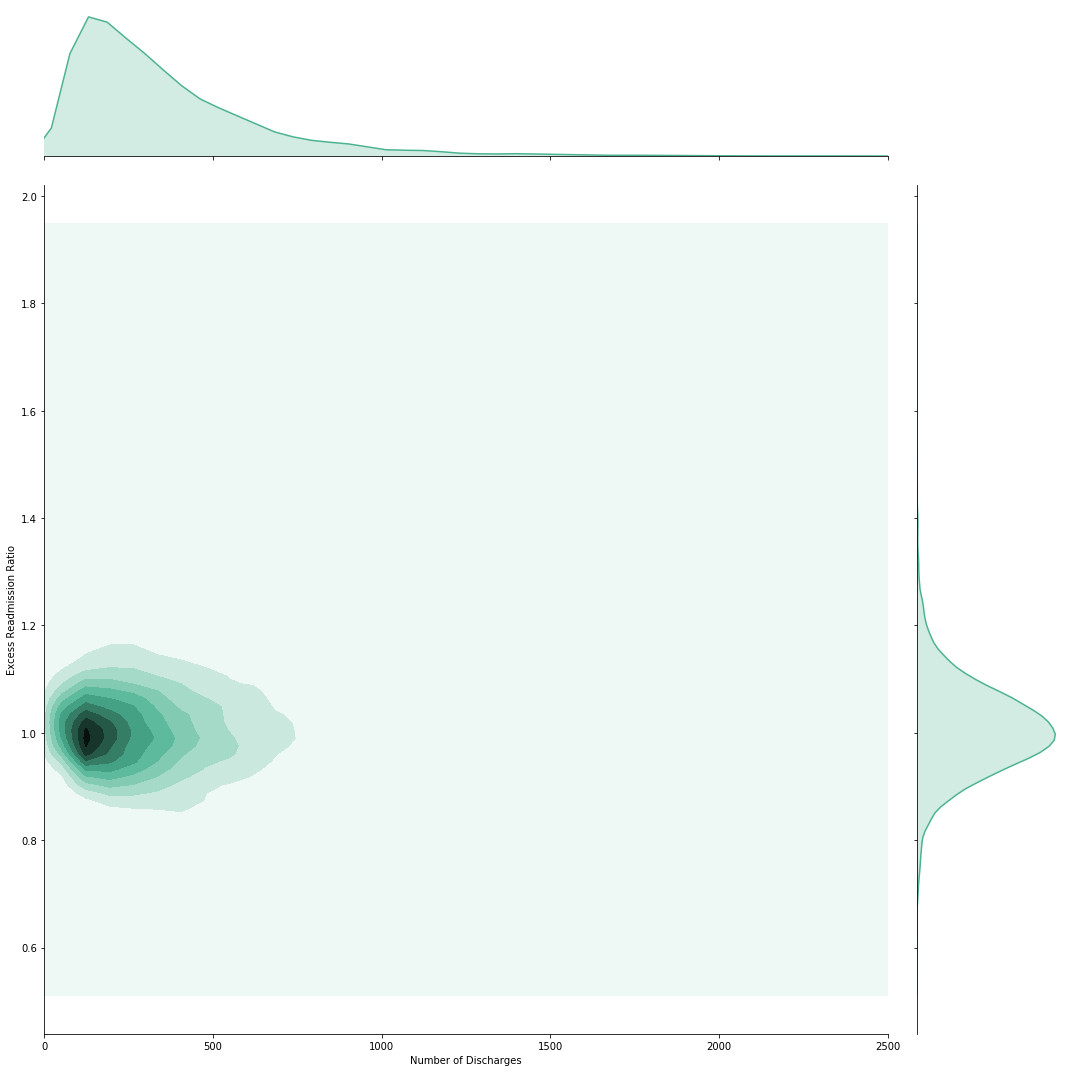

In [84]:
# A kde plot showing the density of the data
kde = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean, kind='kde', color='#4CB391', 
                    height=15)
kde.ax_marg_x.set_xlim(0, 2500)

The kde plot shows how the data is highly concentrated below 500 discharges, suggesting that most of the hospitals in the dataset are rather small. It also shows that the data centers fairly evenly around a ratio of 1.0.

(0, 2500)

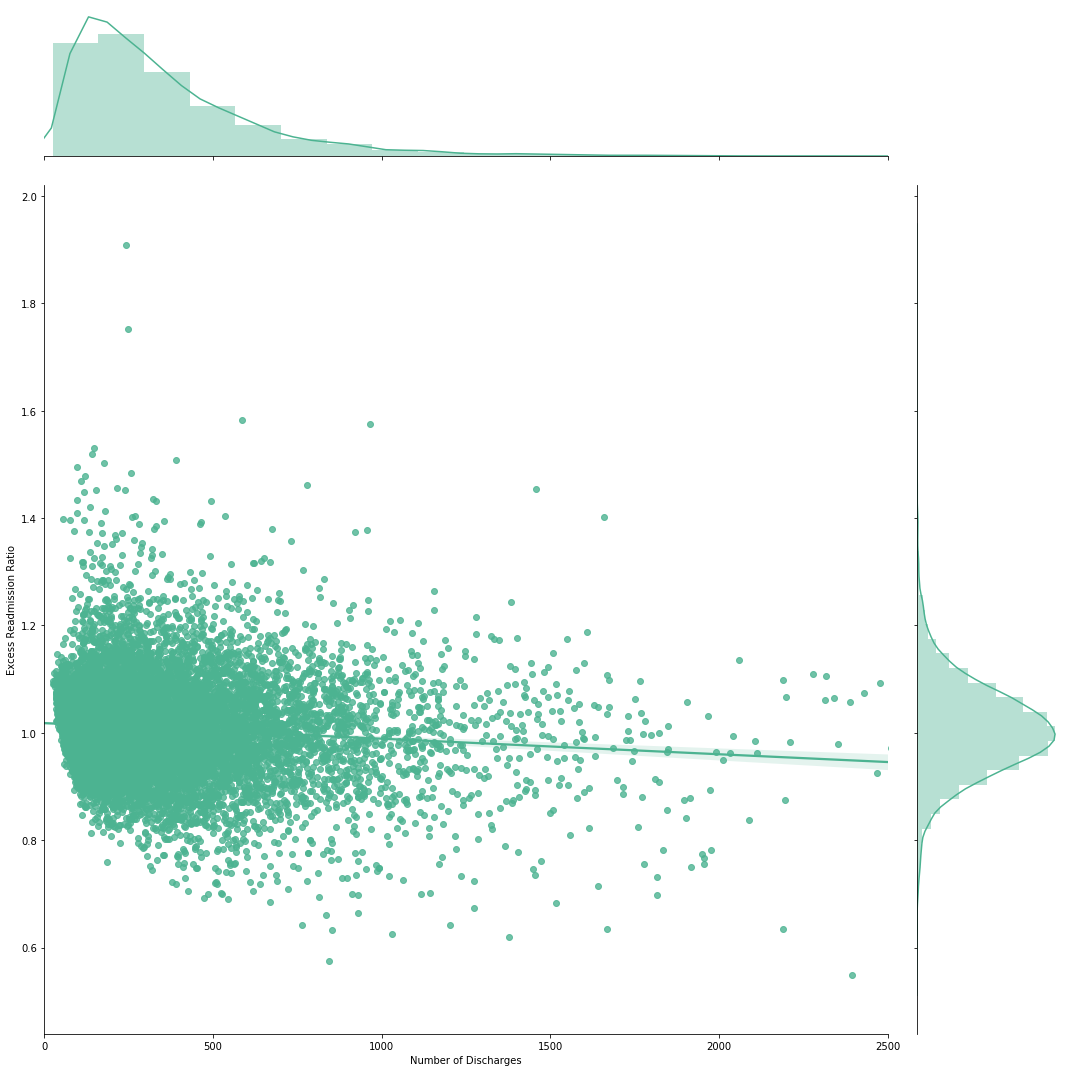

In [85]:
# A regression plot that also show the density as well as the slightly downward correlation between the data
reg = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean, kind='reg', color='#4CB391', 
                    height=15)
reg.ax_marg_x.set_xlim(0, 2500)

In the regression plot, there is a noticable, if slight, downward regresssion as discharges increase. But, again,  the concentration of data is below 500 discharges.

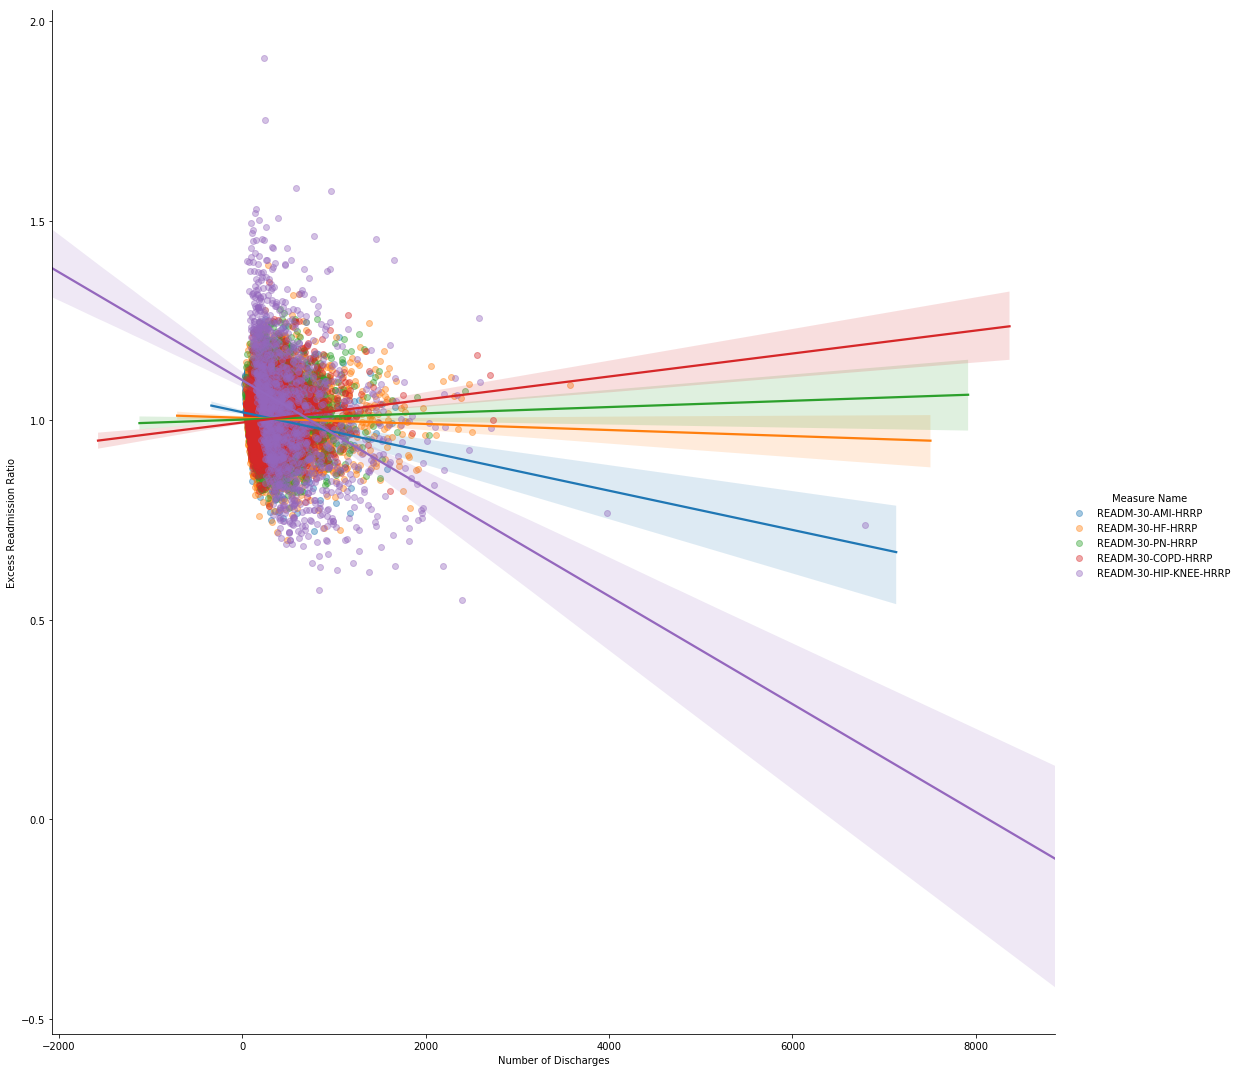

In [94]:
# An lmplot hued by the neasure name to better demonstrate how each type of procedure trends 
lm = sns.lmplot(x='Number of Discharges', y='Excess Readmission Ratio', data=clean, hue='Measure Name', 
                scatter_kws={'alpha':0.4}, height=15)

Finally, in this lmplot, which has been hued by measure name, it makes it clear as to which measures are trending up and down as discharges increase. Hip and knee related readmission ratios seem to be decreasing dramatically as  discharges increase, suggesting that larger hospitals are better equipped to handle such issues. However, the ratios regarding heart problems and pneumonia, which are the ratios that hospitals seem to be most concerned with, don't seem to be decreasing much at all. Heart related ratios seem to stay almost flat, while pnemonia ratios appear to increase slightly. This implies that perhaps larger hospitals aren't any better equipped to to handle these latter two matters than smaller hospitals. 